In [1]:
'''so the aim is to first analyse which type of customers are churning out of the bank, i.e the possible reasons for churning 
and all and at the end come up with a conclusion that if a new entry is made in the dataset what is the likelihood(approximate) of them 
churning out of the bank
'''



<h5>importing the important libraries</h5>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h5>Data Sourcing</h5>

In [31]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")


<h5>displaying the first 5 rows of the dataset</h5>

In [32]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h5>number of rows and columns in this dataset.</h5>

In [34]:
print("rows,columns : ",df.shape)

rows,columns :  (10000, 12)


<h5>getting the count of non null values in each column and their datatype.</h5>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<h5>There are 8 integer type columns, 2 columns of String type, and 2 columns of float type</h5>

<h5>displaying the number of null values in each column</h5>

In [6]:
 
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<h4>there are no null values in the dataset</h4>

<h4>statistical info about the dataset :</h4>

In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


C:\Users\RAJ RANJAN SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


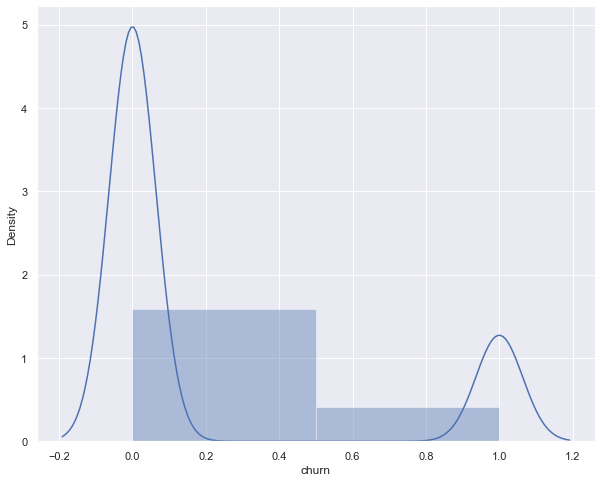

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(df.churn, bins=2)
plt.show()

<h4>the bar on the right shows the number of customers churned by bank, whereas the bar on the left shows the number of customers that weren't churned by the Bank.</h4>

<h5>Checking the correlation of the columns with each other</h5>

<AxesSubplot:>

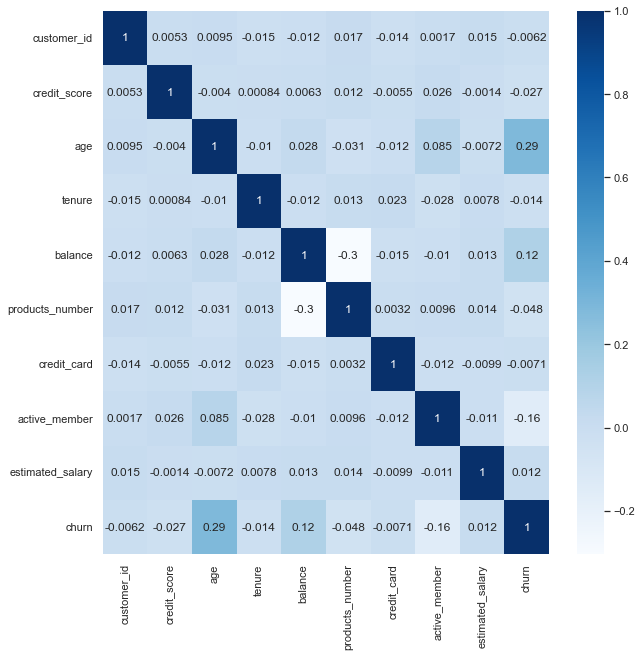

In [9]:
corr = df.corr() # how are the columns related to each other or dependent on each other
sns.set(rc={'figure.figsize': (10,10)}) 

# Plotting the heatmap of correlation between features
sns.heatmap(corr, annot=True, cmap='Blues')

<h4>the column 'churn' is correlated to column 'age', and slightly correlated to column 'balance'
</h4>

<h5>Getting the info about the column "credit_score"(the data it contains)</h5>

In [10]:
df['credit_score']

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: credit_score, Length: 10000, dtype: int64

C:\Users\RAJ RANJAN SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_score'>

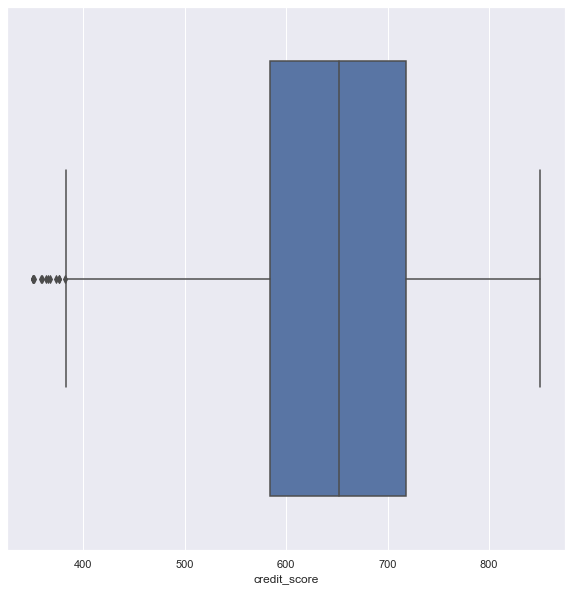

In [11]:
# BOXPLOT to display the outliers
sns.boxplot(df['credit_score'])

<h5>Position of Outliers</h5>

In [12]:
lower = np.where(df['credit_score'] <= 400)
lower

(array([   7,  942, 1193, 1201, 1405, 1631, 1838, 1962, 2473, 2579, 5285,
        5494, 6253, 8154, 8723, 8762, 9210, 9356, 9624], dtype=int64),)

<h5>Dropping the outliers</h5>

In [13]:
df.drop(lower[0],inplace=True)

<h5>Checking whether the outliers have been Removed or not</h5>

C:\Users\RAJ RANJAN SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_score'>

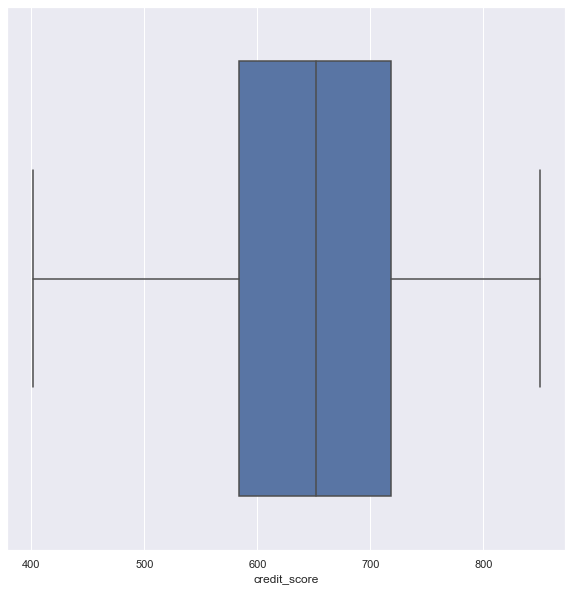

In [14]:
sns.boxplot(df.credit_score)

<h5>Getting the info about the column "age"(the data it contains)</h5>

In [15]:
df.age

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: age, Length: 9981, dtype: int64

<h5>checking if there are any outliers in the column 'age'</h5>

C:\Users\RAJ RANJAN SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

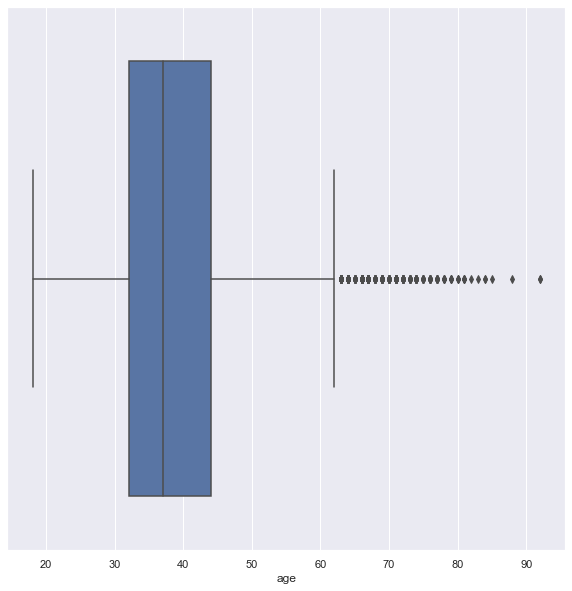

In [16]:
sns.boxplot(df['age'])

<h5>Position of Outliers</h5>

In [17]:
upper= np.where(df['age']>60)
upper

(array([  41,   43,   57,   84,  103,  157,  180,  229,  233,  242,  251,
         275,  309,  363,  370,  384,  386,  398,  415,  483,  537,  558,
         560,  566,  601,  611,  616,  629,  657,  677,  695,  735,  765,
         768,  806,  810,  822,  858,  883,  887,  920,  927,  946,  950,
         955,  961,  967,  995, 1007, 1037, 1038, 1053, 1112, 1116, 1190,
        1201, 1230, 1231, 1242, 1248, 1274, 1281, 1324, 1338, 1383, 1402,
        1405, 1428, 1434, 1452, 1514, 1538, 1583, 1602, 1609, 1636, 1784,
        1804, 1851, 1859, 1894, 1897, 1900, 1926, 1973, 1988, 1994, 2004,
        2031, 2045, 2070, 2086, 2095, 2100, 2146, 2151, 2156, 2236, 2253,
        2266, 2290, 2293, 2425, 2430, 2450, 2451, 2510, 2511, 2524, 2532,
        2544, 2589, 2605, 2649, 2660, 2703, 2707, 2750, 2762, 2767, 2768,
        2771, 2781, 2845, 2867, 2891, 2898, 2915, 2916, 2998, 3023, 3044,
        3100, 3132, 3156, 3182, 3193, 3219, 3295, 3298, 3301, 3304, 3307,
        3336, 3356, 3358, 3368, 3372, 

<h5>The age variable has outliers, but these can be treated as the normal values of age because any person can be over 70 or 80 years of age. Also, the 70–90 age group is sparsely populated and participates in opening term deposit accounts, which is why these sets of people fall out of the box plot, but they are not outliers and can be considered as normal values.</h5>

<h5>Getting the info about the column "balance"(the data it contains)</h5>

<h5>checking if there are any outliers in the column 'balance'</h5>

C:\Users\RAJ RANJAN SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

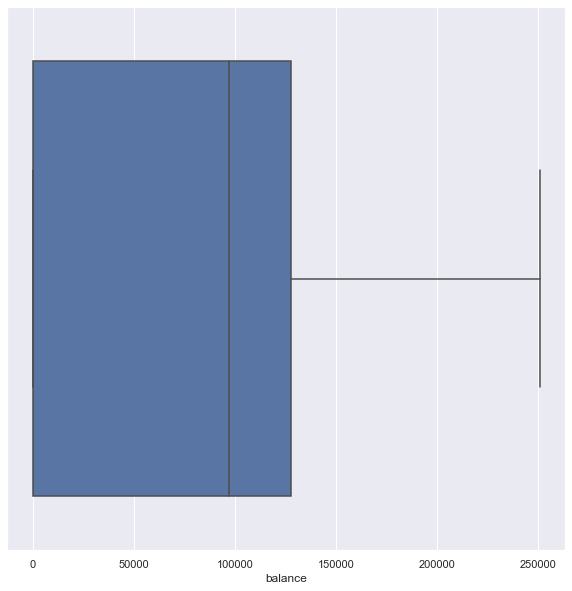

In [18]:
sns.boxplot(df['balance'])

<h5>There are no outliers in this column</h5>

<h5>checking if there are any outliers in the column 'estimated_salary'</h5>

C:\Users\RAJ RANJAN SINGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_salary'>

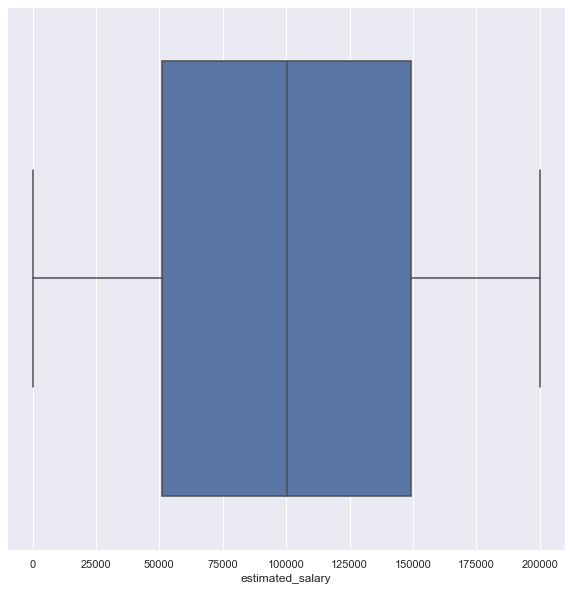

In [19]:
sns.boxplot(df['estimated_salary'])

<h5>There are no outliers in this column</h5>